In [190]:
import re
import json
import time 
from collections import defaultdict

import requests
import pandas as pd
import matplotlib.pyplot as plt

from geopy.distance import vincenty
from IPython.core.pylabtools import figsize 

get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')
figsize(16, 10)


def get_team_path(team_id, city, year):   
    url = "http://stats.nba.com/stats/teamgamelog?LeagueID=00&Season=" \
        "{year}&SeasonType=Regular+Season&TeamID={team_id}".format(year=year, team_id=team_id)

    response = requests.get(url)
    data = json.loads(response.content)['resultSets'][0]
    individual_game_stats = data['rowSet']

    path = [city]

    for game in individual_game_stats:
        result = re.search('[@, vs.](\w{3})', game[3])
        if 'vs.' in game[3]:
            if path[-1] != city:
                path.append(city)
        elif '@' in game[3]:
            path.append(result.group(1))
        else:
            raise
            
    time.sleep(1) #lets not spam nba api and get banned :(
    return path

In [186]:
# Lat, Long
geo_teams = {
    'MIL': (43.043694, -87.91713),
    'MIN': (44.979549, -93.276131),
    'MIA': (25.781233, -80.18782),
    'ATL': (33.7569923, -84.3919983),
    'BOS': (42.3663175, -71.0597084),
    'DET': (42.6963466, -83.2440995),
    'DEN': (39.7473979, -105.007974),
    'SAC': (38.6481556, -121.5210461),
    'BKN': (40.683281, -73.976181),
    'POR': (45.5314969, -122.6667829),
    'ORL': (28.5389544, -81.3842762),
    'TOR': (43.6434402, -79.3789597),
    'CHI': (41.880394, -87.673164),
    'SAS': (29.4251727, -98.4349231),
    'CHA': (35.225163, -80.839302),
    'CLE': (41.5047493, -81.6907196),
    'WAS': (38.898125, -77.02095),
    'LAL': (34.043125, -118.267097),
    'PHI': (39.9052513, -75.1734781),
    'MEM': (35.1394768, -90.0516909),
    'LAC': (34.0417841, -118.2670411),
    'DAL': (32.790302, -96.810219),
    'OKC': (35.463402, -97.514984),
    'PHX': (33.4459, -112.071312),
    'IND': (39.764046, -86.15551),
    'NOP': (29.9440784, -90.083168),
    'HOU': (29.7519596, -95.3622159),
    'NYK': (40.750411, -73.994476),
    'GSW': (37.749272, -122.200155),
    'UTA': (40.768268, -111.901087),
}

team_ids = {
    'Atlanta Hawks': (1610612737, 'ATL'),
    'Boston Celtics': (1610612738, 'BOS'),
    'Brooklyn Nets': (1610612751, 'BKN'),
    'Charlotte Hornets': (1610612766, 'CHA'),
    'Chicago Bulls': (1610612741, 'CHI'),
    'Cleveland Cavaliers': (1610612739, 'CLE'),
    'Detroit Pistons': (1610612765, 'DET'),
    'Indiana Pacers': (1610612754, 'IND'),
    'Miami Heat': (1610612748, 'MIA'),
    'Milwaukee Bucks': (1610612749, 'MIL'),
    'New York Knicks': (1610612752, 'NYK'),
    'Orlando Magic': (1610612753, 'ORL'),
    'Philadelphia 76ers': (1610612755, 'PHI'),
    'Toronto Raptors': (1610612761, 'TOR'),
    'Washington Wizards': (1610612764, 'WAS'),
    'Dallas Mavericks': (1610612742, 'DAL'),
    'Denver Nuggets': (1610612743, 'DEN'),
    'Golden State Warriors': (1610612744, 'GSW'),
    'Houston Rockets': (1610612745, 'HOU'),
    'Los Angeles Clippers': (1610612746, 'LAC'),
    'Los Angeles Lakers': (1610612747, 'LAL'),
    'Memphis Grizzlies': (1610612763, 'MEM'),
    'Minnesota Timberwolves': (1610612750, 'MIN'),
    'New Orleans Pelicans': (1610612740, 'NOP'),
    'Oklahoma City Thunder': (1610612760, 'OKC'),
    'Phoenix Suns': (1610612756, 'PHX'),
    'Portland Trail Blazers': (1610612757, 'POR'),
    'Sacramento Kings': (1610612758, 'SAC'),
    'San Antonio Spurs': (1610612759, 'SAS'),
    'Utah Jazz': (1610612762, 'UTA')
}

In [187]:
def calculate_distance_traveled(path):
    miles_traveled = 0
    distances = []
    start_loc = path[0]
    
    for item in path[1:]:
        distances.append(int(vincenty(geo_teams[start_loc], geo_teams[item]).miles))
        start_loc = item
        
    return sum(distances)

After reading the bleacher report article(http://bleacherreport.com/articles/2552322-as-nba-schedule-maker-departs-he-takes-with-him-an-era-league-wont-see-again) on the NBA scedule maker retiring I wondered which teams have to travel the most over the years

## *Estimate 
Using a great cirle distance between all arenas.

Problems: When team travels to nearby cities they probably use a bus and travel further on the highway then the optimal vincinty distance. 

In [ ]:
data = defaultdict()

for team_name, team_info in team_ids.items():
    data[team_name] = get_team_path(team_info[0], team_info[1], '2014-15')

results = defaultdict()

for team_name, path in data.items():
    results[team_name] = int(calculate_distance_traveled(path))


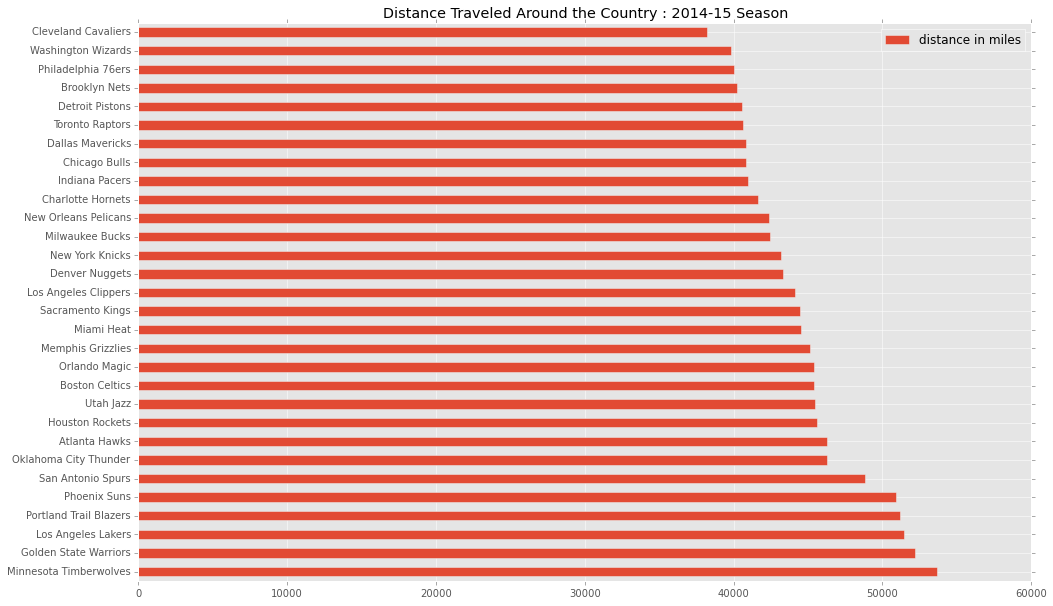

In [198]:
df = pd.DataFrame.from_dict(results, orient='index')
df.columns = ['distance in miles']
df.sort(['distance in miles'], ascending=0, inplace=True)
plot = df.plot(kind='barh', title='Distance Traveled Around the Country : 2014-15 Season')

In [ ]:
data = defaultdict()

for team_name, team_info in team_ids.items():
    data[team_name] = get_team_path(team_info[0], team_info[1], '2013-14')

results = defaultdict()

for team_name, path in data.items():
    results[team_name] = int(calculate_distance_traveled(path))



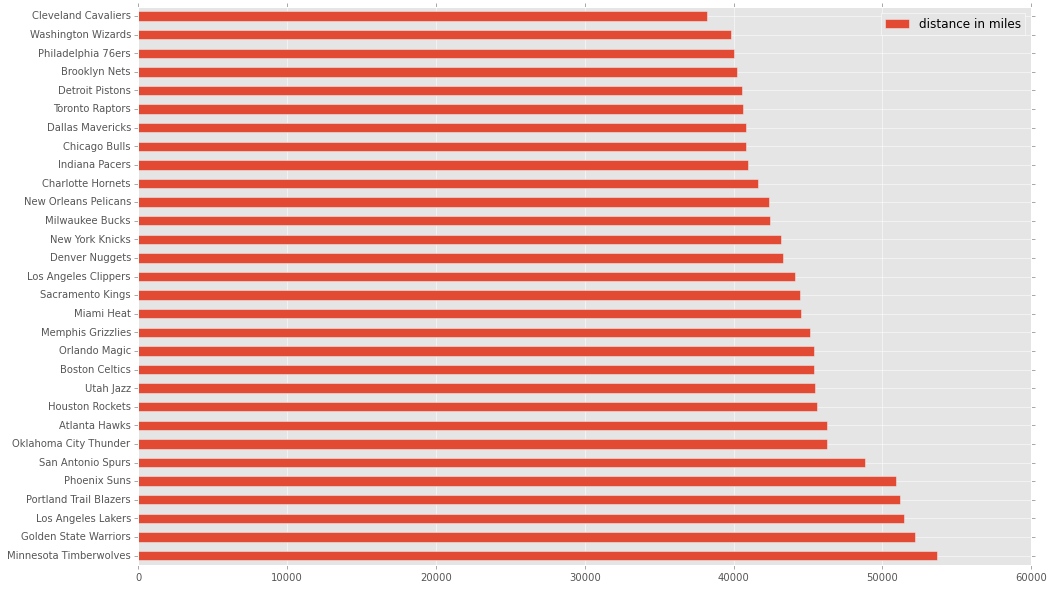

In [193]:
df = pd.DataFrame.from_dict(results, orient='index')
df.columns = ['distance in miles']
df.sort(['distance in miles'], ascending=0, inplace=True)
df.plot(kind='barh')